#Theoretical Questions

###1. What is unsupervised learning in the context of machine learning

In unsupervised learning model is given unlabelled data, to find patterns. The applications are anomaly detection, dimensionality reduction, clustering.


###2. How does K-Means clustering algorithm work
K number of centroid data points are created to cluster the data points.
Below steps are followed to achieve

Step 1: Choose K number of centroids
Step2 : Randomly pick the centroid, in k means++ the centroids are kept as far as possible
Step3: data points are assigned to the nearest centroid based on the distance calculation
Step4: Once all data are assigned, the average point of each cluster is calculated and the centroids are re assigned
 Repeat setp 3,4 until the centroids stabilizes


###3. Explain the concept of a dendrogram in hierarchical clustering
Dendogram is a tree like diagram to explain the arrangements of clusters.
In hierarchical clustering data points are grouped step by step.Dendogram explains the clustering.
Dendogram also used to identify correct number of clusters

###4. What is the main difference between K-Means and Hierarchical Clustering
K means
  - Number of clusters are decided beforehand
  - faster, suitable for large datasets
  - Assumes that clusters are equal size and spherical

Hierarchical
  - Number of clusters are decided after the data points are grouped
  - Complex
  - Can work for clusters of varying size & shape

###5. What are the advantages of DBSCAN over K-Means
DBSCAN can handle noise
DBSACN works wel on data of various shapes like moon
DBSCAN doesnot require predefined number of clusters, it automatically determines the clusters

###6. When would you use Silhouette Score in clustering
Silhouette Score is a metric to determine the quality of the cluster. It comprises of WCSS & OCSS. It is used to
  - Select optimal number of clusters
  - Measure performance of different clustering algorithms
  - Understand cluster cohesiveness & separation

###7. What are the limitations of Hierarchical Clustering
  - Computational complexity
  - Limited to small & medium size data
  - Once cluster is formed it can not be undone
  - Sensitive to outliers
  - Domain knowledge required to cut the dendogram & choos clusters
  - Difficult with dimension data


###8. Why is feature scaling important in clustering algorithms like K-Means
  - Equal contribution of each feature
  - Without sclaing features with higher values will impact the centroid claculation, leading to distorted clusters

###9. How does DBSCAN identify noise points

DBSCAN identifies those point as noise, for which no other point exists within the given radius.In other words, the data points which are not core or border are the noise points

###10. Define inertia in the context of K-Means
Inertia is CSS(Within cluster sum of squared) distance from the closest centroid to all other datapoints within the cluster

###11. What is the elbow method in K-Means clustering

In K means, elbow method is used to determine the number of optimal clusters. A graph is plotted between number of clusters and WCSS. For the value where the graph forms an elbow like plot and the WCSS doesnot change much. That point is considered as the optimal K for clustering

###12. Describe the concept of "density" in DBSCAN
Density is a measure to determine whether there are enough points in a given area to form cluster.There are 2 components of density.
epsilon - the radius of the neighbourhood
minimum data points - to form a cluster min no of data points required.


###13. Can hierarchical clustering be used on categorical data
Yes, but similarity measure & dissimilarity matrix needs to be formed for categorical data.

###14. What does a negative Silhouette Score indicate
Negative silhoutte score indicates data points are mis classified.

###15. Explain the term "linkage criteria" in hierarchical clustering
Linkage criteria is the disatnace mechanism to determine the distance between clusters when merging or splitting them
Types are
 - Single linkage - Shortest distance between two data points one from each cluster.
 - Complete linkage - Largest distance between two data points one from each cluster.
 - Average linkage - Average of pairwise distance between all data points
  - Centroid linkage - distance between their centroids
  - Ward's distance - Increase in variance when two clusters are merged

###16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities

K means assumes clusters are of similar size and spherical.
It favours denser clusters

Kmeans is Centroid based, it works fine only with uniformly distributed data.

###17. What are the core parameters in DBSCAN, and how do they influence clustering

  - epsilon - the radius of the neighbourhood.
  influence - small epsilon means smaller or tight custers
  - minimum data points - to form a cluster min no of data points required.
  influence - smaller minimum points means sparse cluster

###18. How does K-Means++ improve upon standard K-Means initialization
K means initializes centroids randomly. K Means ++ initializes the centroids as far as possible

###19. What is agglomerative clustering

Bottom up approach. Each individual data is considered as a cluster. based on the distance closer clusters are grouped together, until all points belong to 1 cluster.

###20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Inertia considers WCSS only, Silhoutte score considers both WCSS & OCSS. Silhoutte ranges between -1 to 1 (-1  is misclassified, 1 indicates well defined cluster). inertia assumes spherical clusters, Silhoutte is flexible. Silhoutte is suitable for comparing different models

#Practical Questions

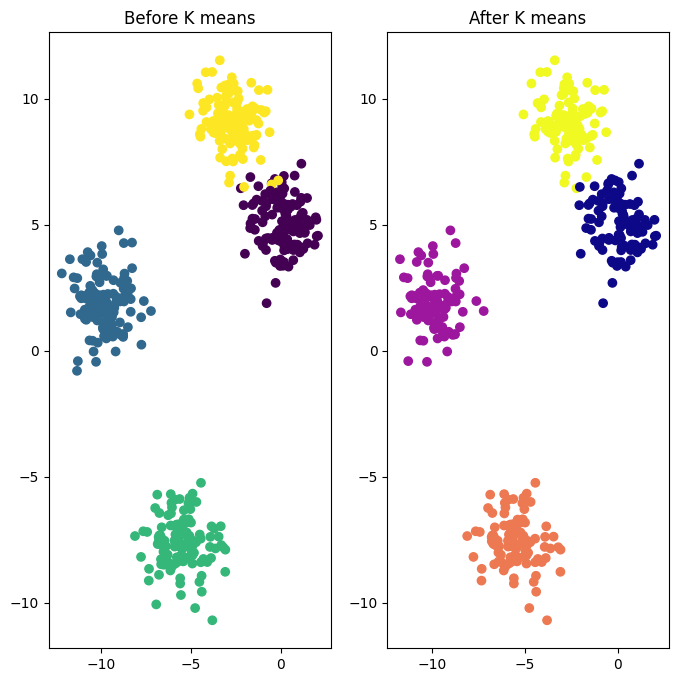

In [ ]:
###21 Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

X,y = make_blobs(n_samples=500,n_features=2,centers=4)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Before K means')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

kmeans = KMeans(n_clusters=4,init='k-means++')
y_labels = kmeans.fit_predict(X_train)

plt.subplot(1,2,2)
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels,cmap='plasma')
plt.title('After K means')
plt.show()

In [3]:
###22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)

cluster = AgglomerativeClustering(linkage='ward',n_clusters=3,metric='euclidean')

labels = cluster.fit_predict(X)

print(f'First 10 predicted labels {labels[:10]}')


First 10 predicted labels [1 1 1 1 1 1 1 1 1 1]


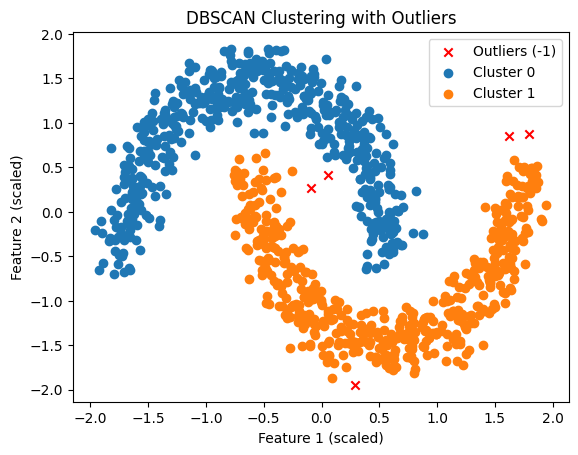

In [14]:
###23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.1)

#plt.scatter(X[:,0],X[:,1],c=y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = DBSCAN(eps=0.2,min_samples=4)

labels = model.fit_predict(X_scaled)
unique_labels = np.unique(labels)

for label in unique_labels:
    if label == -1:
        plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                    color='red', marker='x', label='Outliers (-1)')
    else:
        plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                    label=f'Cluster {label}')

plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

In [ ]:
###24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

X,y = load_wine(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f'{X_scaled.shape}')

kmeans = KMeans(init='k-means++')
labels = kmeans.fit_predict(X_scaled)
unique,counts = np.unique(labels,return_counts=True)

for k,v in zip(unique,counts):
  print(f'Label:{k} Count:{v}')


(178, 13)
Label:0 Count:14
Label:1 Count:34
Label:2 Count:25
Label:3 Count:16
Label:4 Count:6
Label:5 Count:33
Label:6 Count:24
Label:7 Count:26


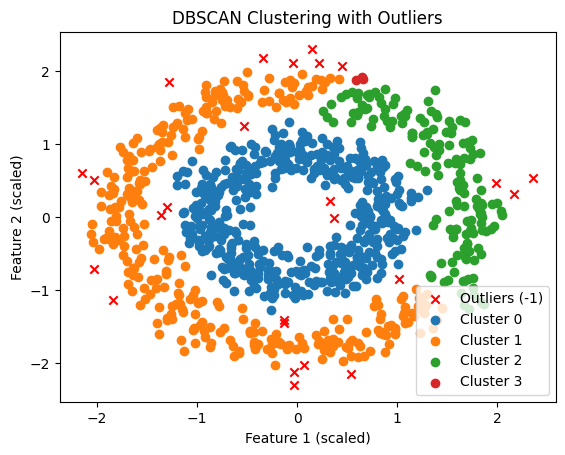

In [25]:
###25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')


X,y = make_circles(n_samples=1000,noise=0.1, factor=0.5)

#plt.scatter(X[:,0],X[:,1],c=y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = DBSCAN(eps=0.17,min_samples=3)

labels = model.fit_predict(X_scaled)
unique_labels = np.unique(labels)

for label in unique_labels:
    if label == -1:
        plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                    color='red', marker='x', label='Outliers (-1)')
    else:
        plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                    label=f'Cluster {label}')

plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

In [ ]:
###26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=feature_names)

print("Cluster Centroids:")
print(centroids_df)

Cluster Centroids:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0   

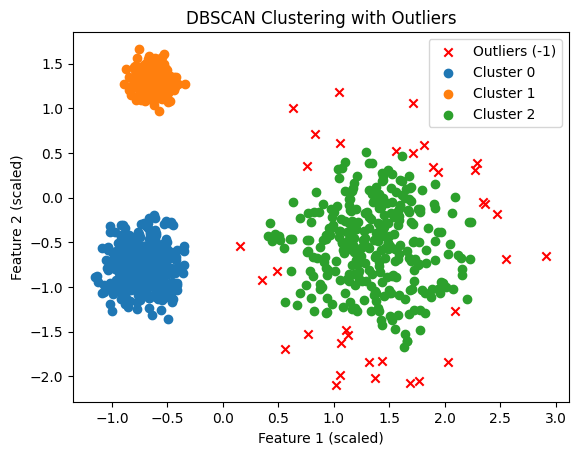

In [31]:
###27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')


X,y = make_blobs(centers=3,n_samples=1000,n_features=2,cluster_std=[1.0, 2.5, 0.5])

#plt.scatter(X[:,0],X[:,1],c=y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = DBSCAN(eps=0.2,min_samples=5)

labels = model.fit_predict(X_scaled)
unique_labels = np.unique(labels)

for label in unique_labels:
    if label == -1:
        plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                    color='red', marker='x', label='Outliers (-1)')
    else:
        plt.scatter(X_scaled[labels == label, 0], X_scaled[labels == label, 1],
                    label=f'Cluster {label}')

plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

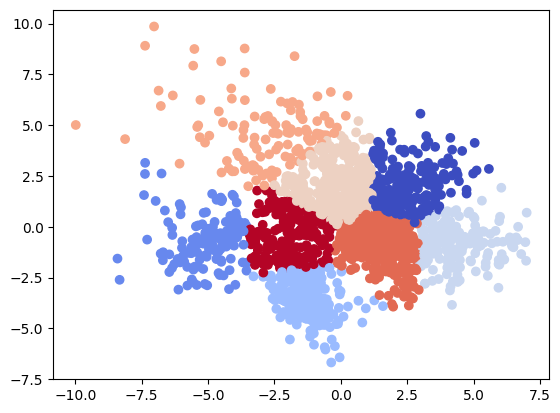

In [34]:
###28.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = load_digits(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

kmeans = KMeans()
labels = kmeans.fit_predict(X_scaled_pca)

plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=labels,cmap='coolwarm')
plt.show()

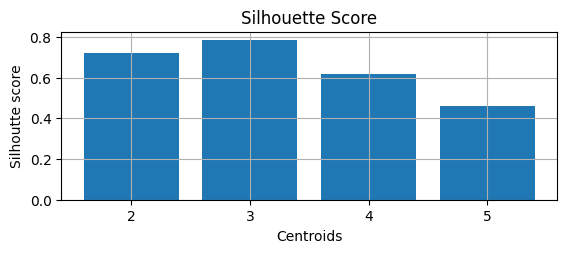

In [ ]:
###29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

X,y = make_blobs(n_samples=1000,n_features=2,centers=3)

silhoutte_coeff = []
for k in range(2,6):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  y_labels = kmeans.fit_predict(X)
  score = silhouette_score(X,y_labels)
  silhoutte_coeff.append(score)
  #plt.subplot(1,4,k-1)
  #plt.scatter(X[:,0],X[:,1],c=y_labels)

plt.subplot(2,1,1)
plt.title("Silhouette Score")
plt.grid(True)
plt.xlabel('Centroids')
plt.ylabel('Silhoutte score')
plt.bar(range(2,6),silhoutte_coeff)
plt.xticks(range(2,6))

plt.show()

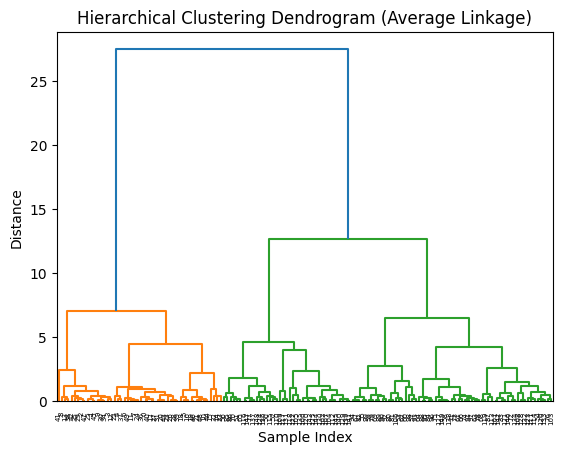

In [38]:
###30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sc

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

cluster = AgglomerativeClustering(linkage='ward',n_clusters=3,metric='euclidean')
labels = cluster.fit_predict(X)

sc.dendrogram(sc.linkage(X_scaled_pca,method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

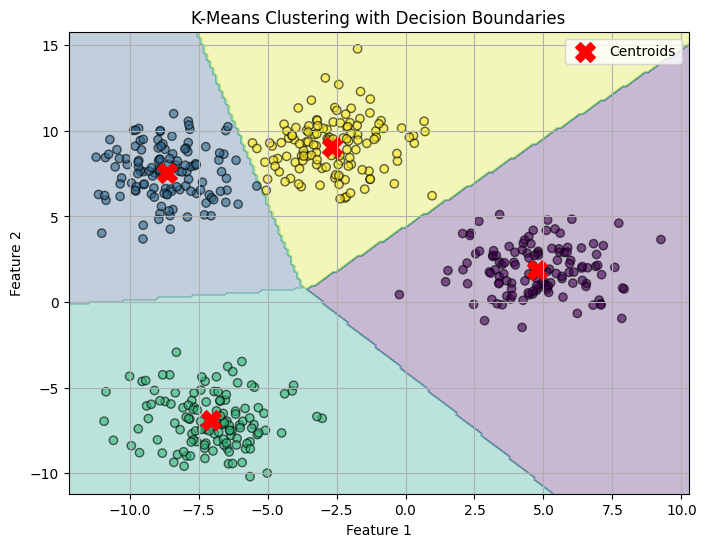

In [ ]:
###31 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with overlapping clusters
X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.5, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and cluster assignments
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='black', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="red", label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering with Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()


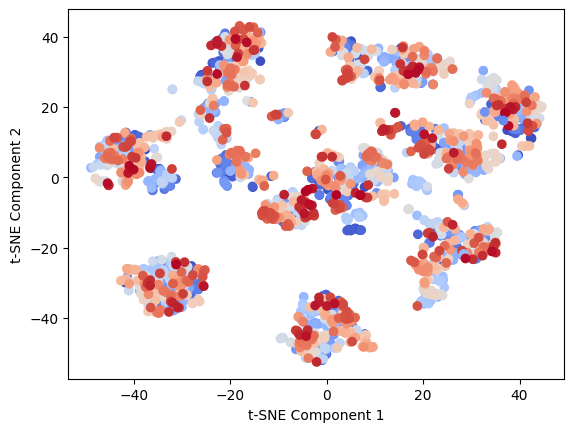

In [48]:
###32 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')

X,y = load_digits(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_scaled_tsne = tsne.fit_transform(X_scaled)

model = DBSCAN(eps=0.1, min_samples=1)
labels = model.fit_predict(X_scaled_tsne)

plt.scatter(X_scaled_tsne[:,0],X_scaled_tsne[:,1],c=labels,cmap='coolwarm')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

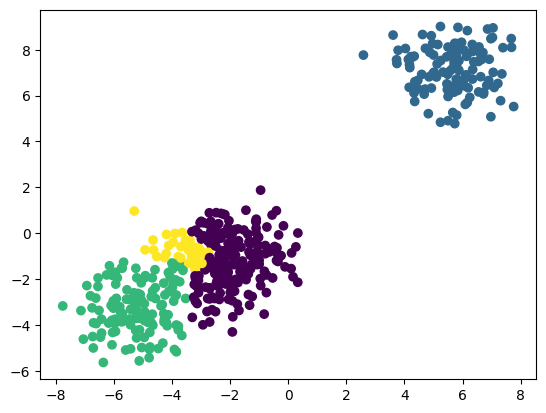

In [50]:
###33 Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

X,y = make_blobs(n_samples=500,n_features=2,centers=4)

cluster = AgglomerativeClustering(linkage='complete',n_clusters=4)

labels = cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

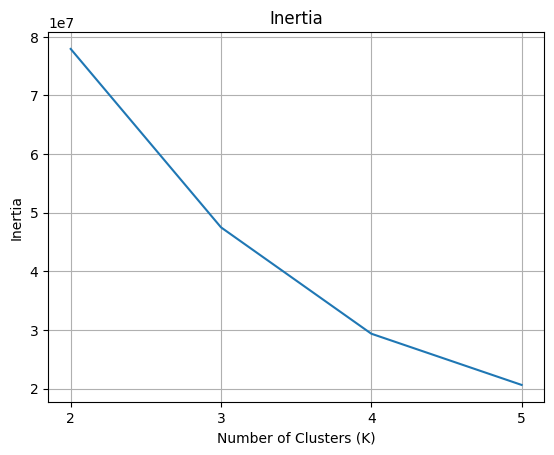

In [ ]:
###34 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

X,y = load_breast_cancer(return_X_y=True)

wcss = []
for k in range(2,6):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  y_labels = kmeans.fit_predict(X)
  wcss.append(kmeans.inertia_)

plt.title("Inertia")
plt.grid(True)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.plot(range(2,6),wcss)
plt.xticks(range(2,6))
plt.show()

[0 1]


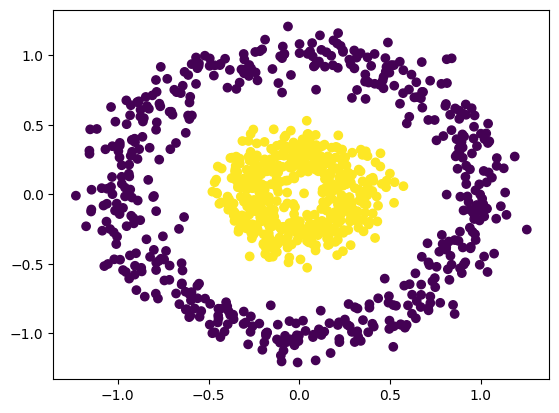

In [54]:
###35 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

X,y = make_circles(n_samples=1000,noise=0.1,factor=0.3)

cluster = AgglomerativeClustering(linkage='single')

labels = cluster.fit_predict(X)
print(np.unique(labels))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

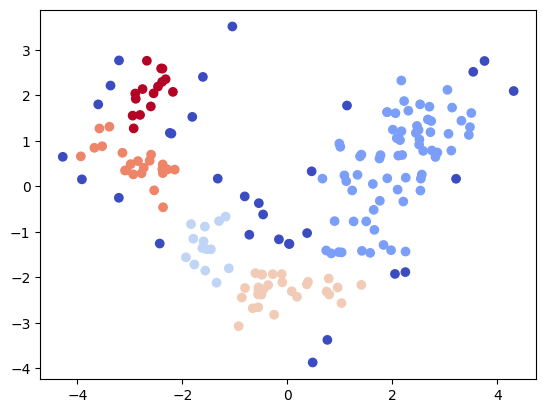

Number of clusters = 5


In [60]:
###36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_wine
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = load_wine(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

model = DBSCAN()
labels = model.fit_predict(X_scaled_pca)

plt.scatter(X_scaled_pca[:,0],X_scaled_pca[:,1],c=labels,cmap='coolwarm')
plt.show()

print(f"Number of clusters = {len(np.unique(labels[labels!=-1]))}")

[[-2.43515999  1.34464602]
 [10.01135407 -9.55399125]
 [ 0.46925491 -8.68817163]
 [-5.20979898 -7.16179321]]


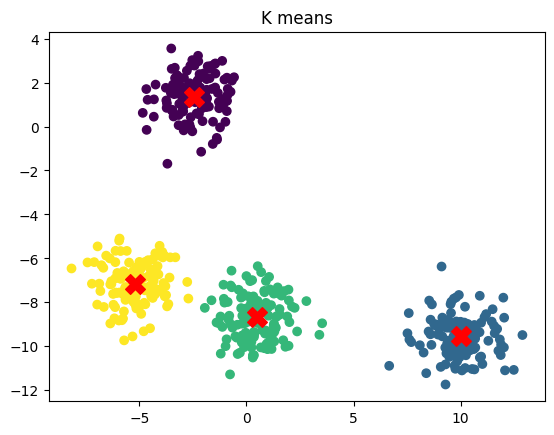

In [ ]:
###37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

X,y = make_blobs(n_samples=500,n_features=2,centers=4)

kmeans = KMeans(n_clusters=4,init='k-means++')
y_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
#print(centroids)
plt.scatter(X[:,0],X[:,1],c=y_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K means')
plt.show()

Number of noise points: 12


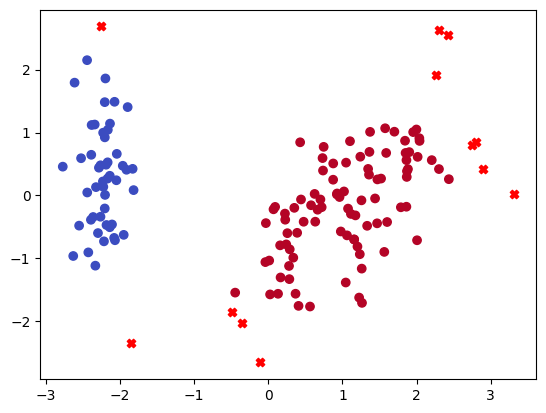

In [68]:
###38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

model = DBSCAN()
labels = model.fit_predict(X_scaled_pca)

num_noise_points = np.sum(labels == -1)
print(f"Number of noise points: {num_noise_points}")

plt.scatter(X_scaled_pca[labels!=-1,0],X_scaled_pca[labels!=-1,1],c=labels[labels!=-1],cmap='coolwarm')
plt.scatter(X_scaled_pca[labels==-1,0],X_scaled_pca[labels==-1,1],marker='X',color='red')
plt.show()



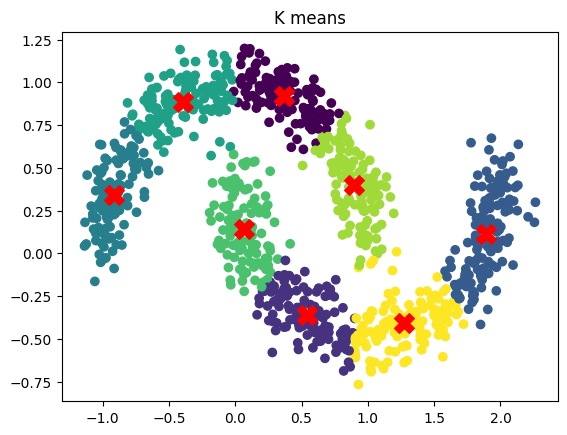

In [ ]:
###39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

X,y = make_moons(n_samples=1000,noise=0.1)

kmeans = KMeans(init='k-means++')
y_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1],c=y_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K means')
plt.show()

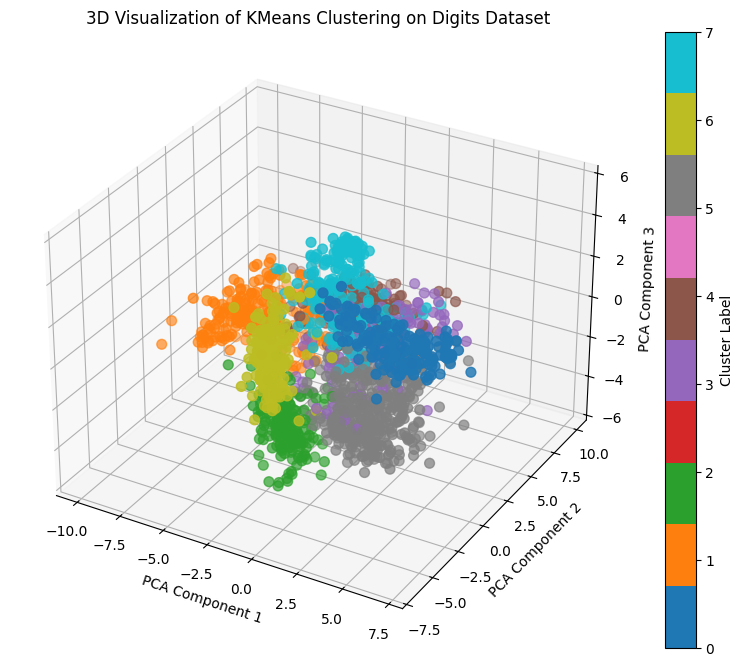

In [69]:
###40 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sc

warnings.filterwarnings('ignore')

X,y = load_digits(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_scaled_pca = pca.fit_transform(X_scaled)

cluster = KMeans()
labels = cluster.fit_predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], X_scaled_pca[:, 2], c=labels, cmap='tab10', s=50)

# Add labels and title
ax.set_title('3D Visualization of KMeans Clustering on Digits Dataset')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

Silhouette Score: 0.63


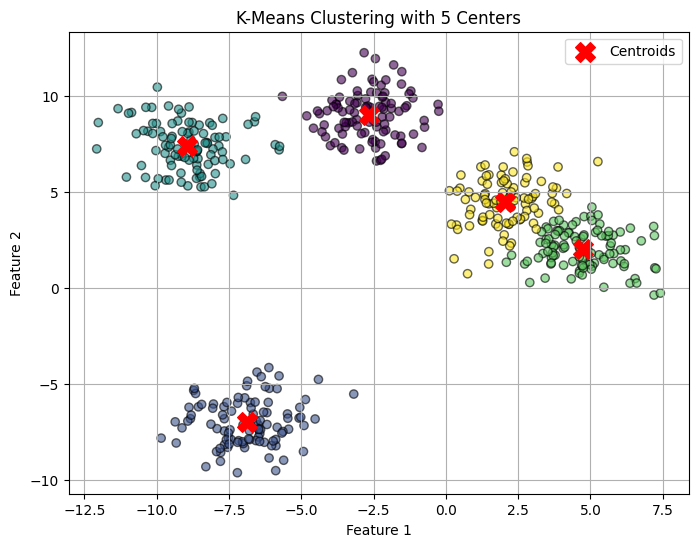

In [ ]:
###41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=1.2, random_state=42)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='black', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, c='red', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering with 5 Centers")
plt.legend()
plt.grid(True)
plt.show()


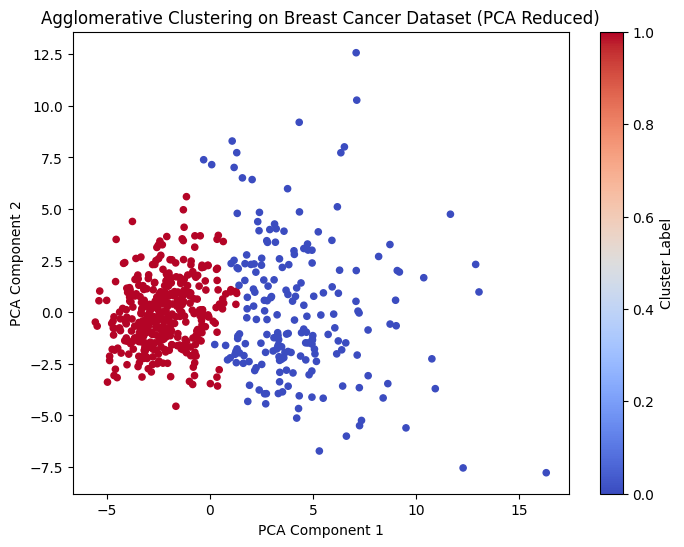

In [78]:
###42 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.Visualize in 2D

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cluster = AgglomerativeClustering(linkage='ward', n_clusters=2)
labels = cluster.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', s=20)
plt.title('Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


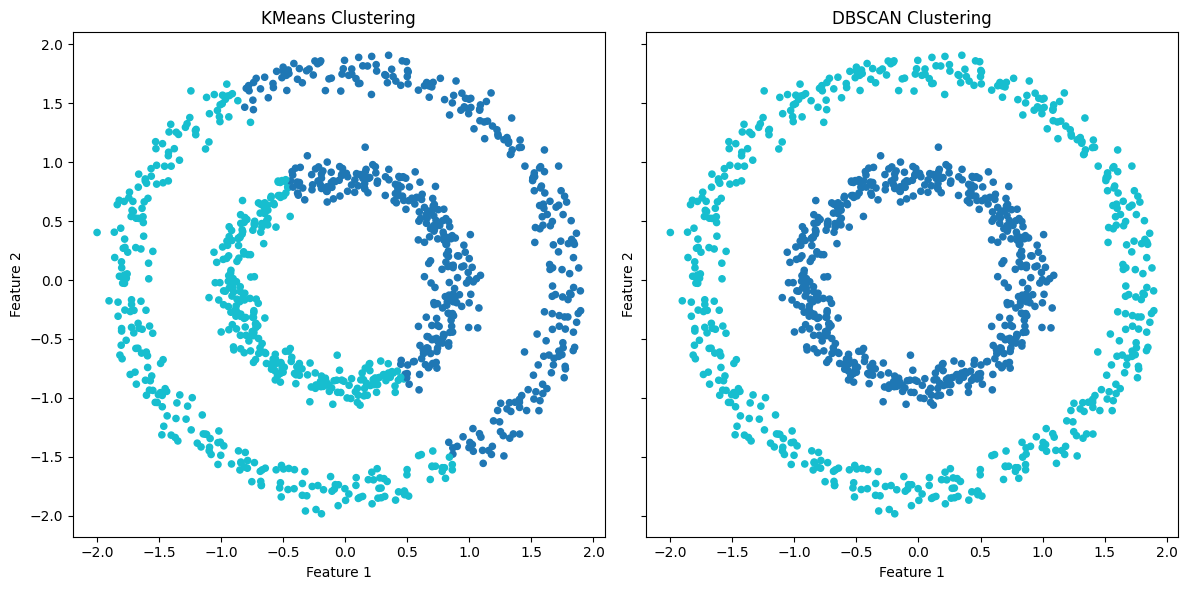

In [79]:
###43 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='tab10', s=20)
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='tab10', s=20)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


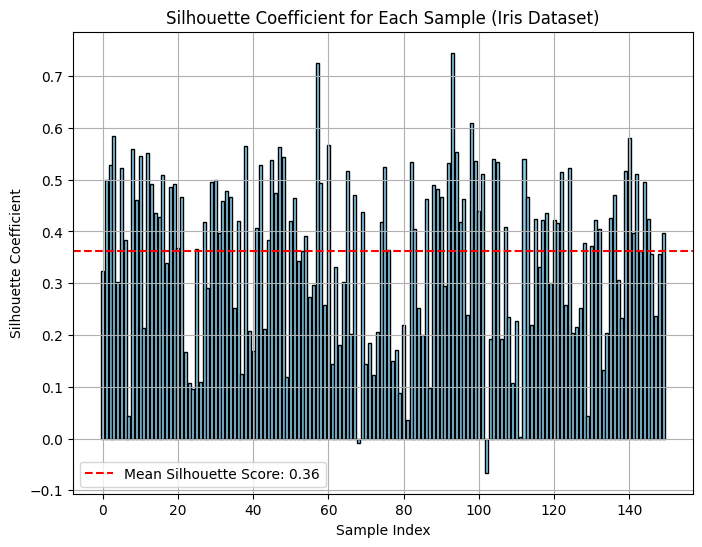

In [ ]:
###44 Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)

kmeans = KMeans(init='k-means++')
y_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
silhouette_vals = silhouette_samples(X, y_labels)
overall_score = silhouette_score(X, y_labels)

plt.figure(figsize=(8, 6))
plt.bar(range(len(silhouette_vals)), silhouette_vals, color='skyblue', edgecolor='black')
plt.axhline(y=overall_score, color='r', linestyle='--', label=f"Mean Silhouette Score: {overall_score:.2f}")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient for Each Sample (Iris Dataset)")
plt.legend()
plt.grid(True)
plt.show()

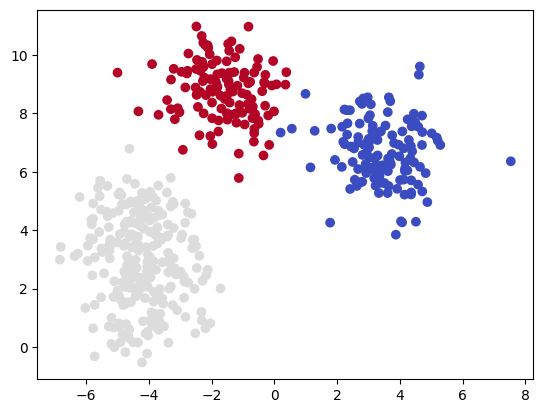

In [70]:
###45 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

X,y = make_blobs(n_samples=500,n_features=2,centers=4)

cluster = AgglomerativeClustering(linkage='average',n_clusters=3,metric='euclidean')

labels = cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=labels,cmap='coolwarm')
plt.show()

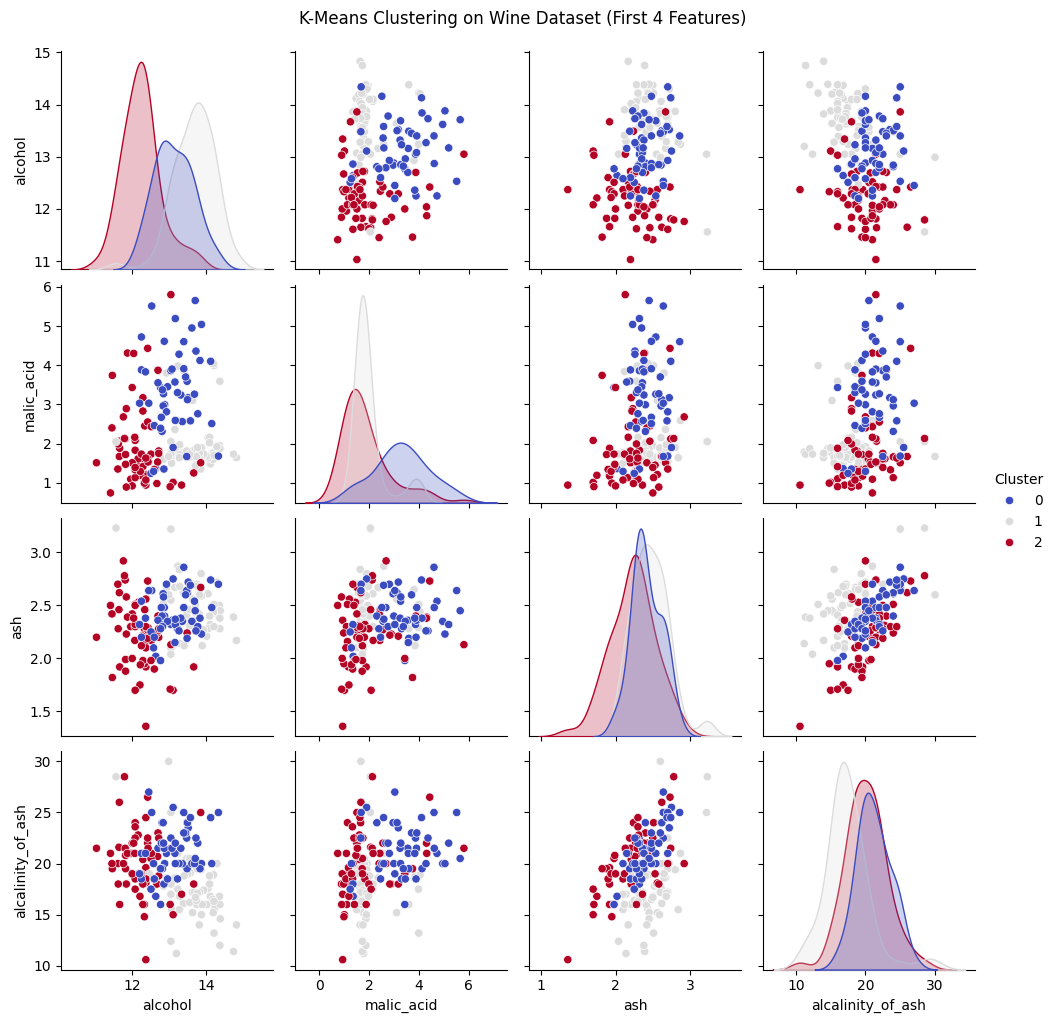

In [ ]:
###46  Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
feature_names = wine.feature_names

df = pd.DataFrame(X, columns=feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='k-means++')
df["Cluster"] = kmeans.fit_predict(X_scaled)

sns.pairplot(df.iloc[:, :4].join(df["Cluster"]), hue="Cluster", palette="coolwarm", diag_kind="kde")
plt.suptitle("K-Means Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


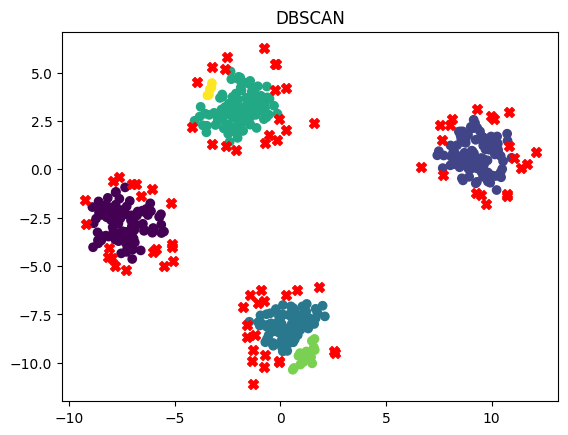

Noise count 79


In [76]:
###47 Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')

X,y = make_blobs(n_samples=500,n_features=2,centers=4)

model = DBSCAN()
y_labels = model.fit_predict(X)
plt.scatter(X[y_labels!=-1,0],X[y_labels!=-1,1],c=y_labels[y_labels!=-1])
plt.scatter(X[y_labels==-1, 0], X[y_labels==-1, 1], marker='X', s=50, c='red', label='noise')
plt.title('DBSCAN')
plt.show()

print(f"Noise count {np.sum(y_labels==-1)}")

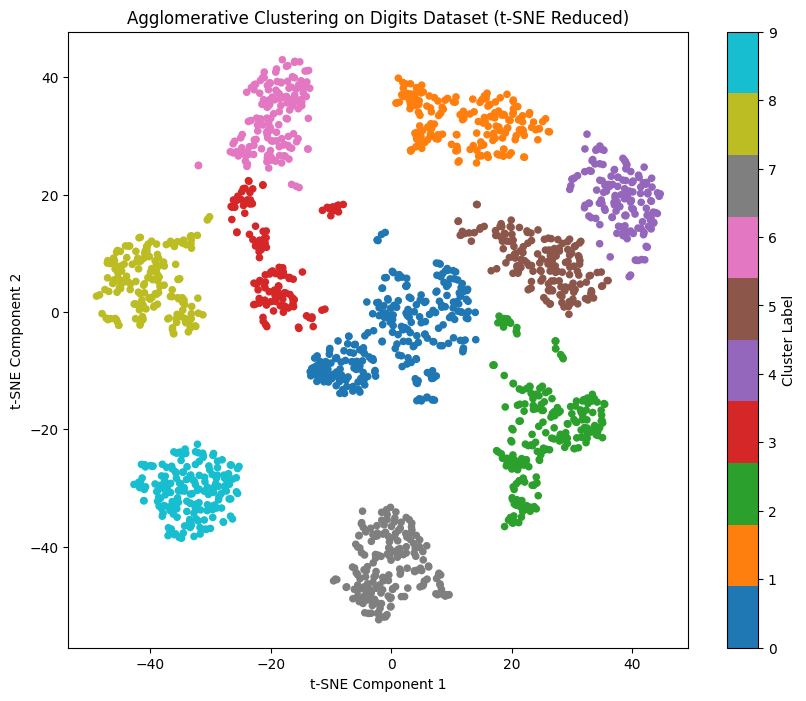

In [77]:
###48  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X, y = load_digits(return_X_y=True)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

cluster = AgglomerativeClustering(linkage='ward', n_clusters=10)  # Choose 10 clusters for digit categories
labels = cluster.fit_predict(X_tsne)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=20)
plt.title('Agglomerative Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
